# Exercise 2 - Clustering
### Duarte Balata (46304) e Miguel Oliveira (55772)

We start by importing the required packages and loading the Iris dataset. 

Then, we split the dataset into a training and a test group and define a function to later assign the predicted clusters to their corresponding target groups. For the train-test split, we stratify our split by classes in order to avoid sampling bias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics.cluster import contingency_matrix
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import sompy

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
y_test

#assigns predicted clusters with corresponding target groups
def correctLabels(predicted, y):
    labels = np.zeros_like(predicted)
    for i in range(3):
        mask = (predicted == i)
        labels[mask] = mode(y[mask])[0]
    return labels

## K-means

We then proceed by using a k-means algorithm do cluster the data into 3 distinct cluster correspoding to the categories on our target data (Iris species). We then predict the labels of our train set, based on the fitted model.

Since the identifying number of the generated clusters is attributed at random, we have to perform the correspondence between the cluster number and the values of the target group, used to designate each of the species. We do that by checking the most frequent cluster number assigned to the samples belonging to each of the classes and chaging this number to the one used to designate the species on the target column (*correctLabels* funtion). This allows to obtain a clearer contigency matrix (diagonal), as well as to perform the accuracy tests.

By looking at the contingency matrix, it is possible to infer that the species *Iris setosa* presents the more distinct features, being perfectly assigned to cluster number 0. Species *Iris versicolor* and *Iris virginica*, on the other hand, might be considered harder to tell apart, since 2 samples of *Iris versicolor* were assigned to the 'virginica cluster' and 8 samples of *Iris versicolor* were clustered with *Iris virginica*.

In [2]:
km = KMeans(n_clusters=3)
km.fit(X_train)

km_predicted = km.predict(X_train)

km_labels_train = correctLabels(km_predicted, y_train)

cm = contingency_matrix(y_train, km_labels_train)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,34,0,0
versicolor,0,31,2
virginica,0,8,25


In [3]:
print("Accuracy score: " + str(round(accuracy_score(y_train, km_labels_train),2)))

Accuracy score: 0.9


We then test the model's performance on the test data. 

In [4]:
km_predicted = km.predict(X_test)

km_labels_test = correctLabels(km_predicted, y_test)

cm = contingency_matrix(y_test, km_labels_test)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,16,0,0
versicolor,0,17,0
virginica,0,6,11


In [5]:
print("Accuracy score: " + str(round(accuracy_score(y_test, km_labels_test),2)))

Accuracy score: 0.88


## GMM

We follow up by using the same approach, but this time, performing the clustering using a Gaussian Mixture Model with 3 components.

We then predict the species cluster by assigning each of the samples to the 3 identified components and visualize the clustering using a contigency matrix.

By looking at the contigency matrix for the training set, we can see that using this technique, we have now obtained two perfectly clustered species (*Iris setosa* and *Iris virginica*), with only 3 *Iris versicolor* sample being assigned to the wrong cluster.

In [6]:
gm = GaussianMixture(n_components=3).fit(X_train)
gm_predicted = gm.predict(X_train)

gm_labels_train = correctLabels(gm_predicted, y_train)

cm = contingency_matrix(y_train, gm_labels_train)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,34,0,0
versicolor,0,30,3
virginica,0,0,33


In [7]:
print("Accuracy score: " + str(round(accuracy_score(y_train, gm_labels_train),2)))

Accuracy score: 0.97


We then use GMM to classify our test dataset.

In [8]:
gm_predicted = gm.predict(X_test)
gm_labels_test = correctLabels(gm_predicted, y_test)

cm = contingency_matrix(y_test, gm_labels_test)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,16,0,0
versicolor,0,15,2
virginica,0,0,17


In [9]:
print("Accuracy score: " + str(round(accuracy_score(y_test, gm_labels_test),2)))

Accuracy score: 0.96


## SOM

Finally, we perform the same clustering by using a Self Organizing Map model. 

In order to do so, we start by training the model on our train dataset using a Mapsize of 20x20 and the default SOM parameters.

In [10]:
mapsize = [20,20]
som = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy') 
som.train(n_job=8, verbose=None)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,

By lookign at the U-matrix representation, we can easily identify two well separated clusters. The upper cluster is expected to correspond to the *Iris setosa* species, since it presents the most distinct features. The downer one, on the other hand, is expected to include both *Iris virginica* and *Iris versicolor*, since the distinction between these two groups tends to be less clear.

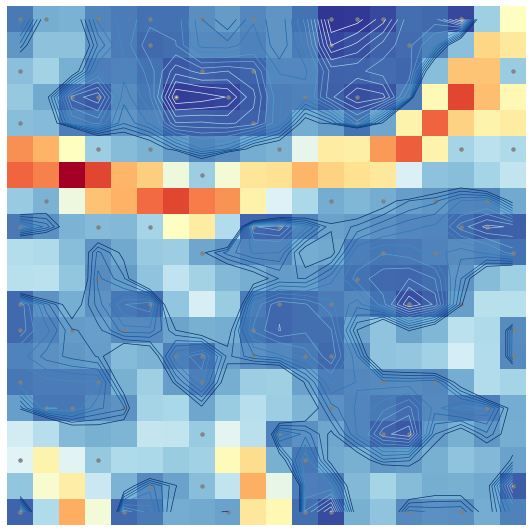

In [16]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

We then cluster the trained neurons on our matrix into the known 3 distinct groups, check the neuron with which each sample of our train dataset is more closely related to and retrieve the cluster number assigned to that specific neuron.

In [11]:
som.cluster(n_clusters=3)

#retrieving the cluster that each data point belongs to
clusters = []

for e in som.project_data(X_train):
    point_cluster = getattr(som, 'cluster_labels')[e] #retriving the cluster number of each specific neuron
    clusters.append(point_cluster)

som_predicted = np.array(clusters)

Having performed the cluster attribution for each sample, we build the contigency matrix for the train. From this matrix, it's possible to observe that *Iris versicolor* and *Iris virginica* continue to be the harder species to classify, as previously observed with the other algorithms.

In [12]:
som_labels_train = correctLabels(som_predicted, y_train)

cm = contingency_matrix(y_train, som_labels_train)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,34,0,0
versicolor,0,29,4
virginica,0,1,32


In [13]:
print("Accuracy score: " + str(round(accuracy_score(y_train, som_labels_train),2)))

Accuracy score: 0.95


Lastly, we perform the same clustering task on our test dataset.

In [14]:
clusters = []

for e in som.project_data(X_test):
    point_cluster = getattr(som, 'cluster_labels')[e] #retriving the cluster number of each specific neuron
    clusters.append(point_cluster)

som_predicted = np.array(clusters)

som_labels_test = correctLabels(som_predicted, y_test)

cm = contingency_matrix(y_test, som_labels_test)
df = pd.DataFrame(cm)
df.index=iris.target_names
df

,0,1,2
setosa,16,0,0
versicolor,0,13,4
virginica,0,1,16


In [15]:
print("Accuracy score: " + str(round(accuracy_score(y_test, som_labels_test),2)))

Accuracy score: 0.9


We conclude that the **Gaussian Mixture Model works best** for clustering samples from this dataset, presenting a very high accuracy on both training and test sets. The good performance verified for this model can be related to the fact that it is able to handle non-circular data much better than k-means and also due to the soft-classfication technique employed, where it calculates the probabilities that a given data point belongs to each of the possible clusters.

We can order the clustering techniques based on their performance for this problem (measured by accuracy score) as follows:

**Training set:**
GMM (0.97) > SOM (0.95) > KM (0.90)

**Test set:**
GMM (0.96) > SOM (0.90) > KM (0.88)